Parcial #4 Astronomía de Posición

- Mariana Gómez Cuartas

>[a](#scrollTo=v3jtcF74JEjk)

>[b](#scrollTo=6ImMajihKncy)

>[c](#scrollTo=dimbn2HKMT5z)

>>[Veamos para la primera temporada de eclípses](#scrollTo=LuhzQCUgLwwW)

>>[Veamos para la segunda temporada de eclípses](#scrollTo=DlEcqRQESmMk)

>[d](#scrollTo=lrdWEq_7qTnb)



#a

In [ ]:
#comencemos por ver como es la longitud del nodo para una fecha particular

import pandas as pd
import numpy as np

def dia_juliano(fecha):
  '''Ingrese la fecha de la forma "yy-mm-dd"'''
  fecha= pd.to_datetime(fecha)
  Y = fecha.year
  M = fecha.month
  D= fecha.day
  if M>2:
    Y = Y
    M = M
  elif M==1 or M==2:
    Y= Y-1
    M= M + 12
  A= int(Y/100)
  B= 2 - A + int(A/4)
  JD= int(365.25 *(Y + 4716)) + int(30.6001 *(M + 1)) + D + B - 1524.5
  return JD                       #me regresa el valor a las cero horas

def primera_circunferencia(grados):
  if grados > 360:
    grados = grados - int(grados/360)*360
  if grados < 0:
    grados = 360 + grados - int(grados/360)*360
  return grados

def long_nodo(fecha):
  '''Ingrese la fecha de la forma "yy-mm-dd"'''
  fecha= pd.to_datetime(fecha)
  FJ = dia_juliano(fecha)
  J2000 = 2451545
  T = (FJ - J2000)/(36525)
  long_nodo = primera_circunferencia(125.04 - 1934.13 * T)
  return long_nodo

In [ ]:
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 20.0 MB/s 
     |████████████████████████████████| 832 kB 67.3 MB/s 
     |████████████████████████████████| 48 kB 1.6 MB/s 
     |████████████████████████████████| 4.1 MB 28.1 MB/s 


In [ ]:
from astroquery.jplhorizons import Horizons

dic= {'start':'2023-01-01', 'stop':'2023-12-31', 'step':'1d'}
sun = Horizons(id = 'sun', location='500', epochs = dic)
eph = sun.ephemerides()

In [ ]:
sun = pd.DataFrame()
sun['Date'] = np.array(pd.to_datetime(eph['datetime_str']))
sun['Longitud eclíptica'] = np.array(eph['ObsEclLon'])
sun['Longitud del nodo ascendente'] = sun['Date'].apply(long_nodo)
sun['Distancia angular entre el sol y el nodo ascendente'] = abs(sun['Longitud eclíptica'] - sun['Longitud del nodo ascendente'])
sun['Longitud del nodo descendente'] = (sun['Longitud del nodo ascendente'] + 180).apply(primera_circunferencia)
sun['Distancia angular entre el sol y el nodo descendente'] = abs(sun['Longitud eclíptica'] - sun['Longitud del nodo descendente'])
sun

,Date,Longitud eclíptica,Longitud del nodo ascendente,Distancia angular entre el sol y el nodo ascendente,Longitud del nodo descendente,Distancia angular entre el sol y el nodo descendente
0,2023-01-01,280.283870,40.203338,240.080532,220.203338,60.080532
1,2023-01-02,281.302885,40.150385,241.152500,220.150385,61.152500
2,2023-01-03,282.321870,40.097431,242.224439,220.097431,62.224439
3,2023-01-04,283.340826,40.044478,243.296348,220.044478,63.296348
4,2023-01-05,284.359749,39.991524,244.368225,219.991524,64.368225
...,...,...,...,...,...,...
360,2023-12-27,274.945137,21.140045,253.805092,201.140045,73.805092
361,2023-12-28,275.963739,21.087091,254.876648,201.087091,74.876648
362,2023-12-29,276.982423,21.034138,255.948286,201.034138,75.948286
363,2023-12-30,278.001191,20.981184,257.020007,200.981184,77.020007


#b
Supongamos que la temporada de eclipses comienza cuando el la distancia angular entre el sol y uno de los nodos de la órbita lunar es de 15°

In [ ]:
temp_1 = sun.loc[sun['Distancia angular entre el sol y el nodo ascendente'] <15]
fechas = np.array(temp_1['Date'])
print('la primera temporada de eclipses comienza el' , fechas[0], ' y termina el ', fechas[-1])
#print('la primera temporada de eclipses dura ' , dia_juliano(fechas[-1]) - dia_juliano(fechas[0]), ' días')

la primera temporada de eclipses comienza el 2023-04-11T00:00:00.000000000  y termina el  2023-05-09T00:00:00.000000000


In [ ]:
temp_2 = sun.loc[sun['Distancia angular entre el sol y el nodo descendente'] <15]
fechas = np.array(temp_2['Date'])
print('la segunda temporada de eclipses comienza el' , fechas[0], ' y termina el ', fechas[-1])
print('la segunda temporada de eclipses dura ' , dia_juliano(fechas[-1]) - dia_juliano(fechas[0]), ' días')

la segunda temporada de eclipses comienza el 2023-10-05T00:00:00.000000000  y termina el  2023-11-01T00:00:00.000000000
la segunda temporada de eclipses dura  27.0  días


In [ ]:
temp_2

,Date,Longitud eclíptica,Longitud del nodo ascendente,Distancia angular entre el sol y el nodo ascendente,Longitud del nodo descendente,Distancia angular entre el sol y el nodo descendente
277,2023-10-05,191.497247,25.535193,165.962054,205.535193,14.037946
278,2023-10-06,192.482432,25.482239,167.000192,205.482239,12.999808
279,2023-10-07,193.468255,25.429286,168.038969,205.429286,11.961031
280,2023-10-08,194.454712,25.376332,169.078380,205.376332,10.921620
281,2023-10-09,195.441798,25.323379,170.118420,205.323379,9.881580
282,2023-10-10,196.429506,25.270425,171.159081,205.270425,8.840919
283,2023-10-11,197.417829,25.217471,172.200357,205.217471,7.799643
284,2023-10-12,198.406759,25.164518,173.242241,205.164518,6.757759
285,2023-10-13,199.396290,25.111564,174.284726,205.111564,5.715274
286,2023-10-14,200.386414,25.058611,175.327803,205.058611,4.672197


#c

##Veamos para la primera temporada de eclípses

In [ ]:
from astroquery.jplhorizons import Horizons

dic= {'start':'2023-01-01', 'stop':'2023-12-31', 'step':'1d'}
moon = Horizons(id = 301, location='500', epochs = dic)
eph = moon.ephemerides()

In [ ]:
moon = pd.DataFrame()
moon['Date'] = np.array(pd.to_datetime(eph['datetime_str']))
moon['Longitud eclíptica'] = np.array(eph['ObsEclLon'])
temp_1_luna = moon.loc[100:128]

In [ ]:
temp_1_sol = pd.DataFrame()
temp_1_sol['Date'] = temp_1_luna['Date']
temp_1_sol['Longitud eclíptica sol'] = temp_1['Longitud eclíptica']
temp_1_sol['Longitud eclíptica Luna'] = temp_1_luna['Longitud eclíptica']
temp_1_sol['Distancia angular Sol-Luna'] = abs(temp_1_sol['Longitud eclíptica sol'] - temp_1_sol['Longitud eclíptica Luna'])
temp_1_sol

,Date,Longitud eclíptica sol,Longitud eclíptica Luna,Distancia angular Sol-Luna
100,2023-04-11,20.849254,259.886244,239.036990
101,2023-04-12,21.830715,273.740396,251.909681
102,2023-04-13,22.811702,287.771970,264.960268
103,2023-04-14,23.792213,301.957061,278.164848
104,2023-04-15,24.772244,316.260118,291.487874
105,2023-04-16,25.751790,330.631530,304.879740
106,2023-04-17,26.730844,345.007784,318.276940
107,2023-04-18,27.709402,359.315049,331.605647
108,2023-04-19,28.687457,13.475984,15.211473
109,2023-04-20,29.665003,27.418446,2.246556


In [ ]:
eclipse_solar_1 = temp_1_sol.loc[temp_1_sol['Distancia angular Sol-Luna'] == min(temp_1_sol['Distancia angular Sol-Luna'])]
eclipse_solar_1

,Date,Longitud eclíptica sol,Longitud eclíptica Luna,Distancia angular Sol-Luna
109,2023-04-20,29.665003,27.418446,2.246556


In [ ]:
print('El día 20 de abril de 2022 habrá un eclipse solar')

El día 20 de abril de 2022 habrá un eclipse solar


In [ ]:
#veamos ahora cundo ocurre eclipse lunar

value = 180
idx = (temp_1_sol['Distancia angular Sol-Luna'] - value).abs().idxmin()
nearest = temp_1_sol['Distancia angular Sol-Luna'].loc[idx]
eclipse_lunar_1 = temp_1_sol.loc[temp_1_sol['Distancia angular Sol-Luna'] == nearest]
eclipse_lunar_1

,Date,Longitud eclíptica sol,Longitud eclíptica Luna,Distancia angular Sol-Luna
125,2023-05-06,45.229495,228.587821,183.358326


In [ ]:
print('El día 6 de mayo de 2022 habrá un eclipse lunar')

El día 6 de mayo de 2022 habrá un eclipse lunar


##Veamos para la segunda temporada de eclípses

In [ ]:
from astroquery.jplhorizons import Horizons

dic= {'start':'2023-01-01', 'stop':'2023-12-31', 'step':'1d'}
moon = Horizons(id = 301, location='500', epochs = dic)
eph = moon.ephemerides()

In [ ]:
moon_2 = pd.DataFrame()
moon_2['Date'] = np.array(pd.to_datetime(eph['datetime_str']))
moon_2['Longitud eclíptica'] = np.array(eph['ObsEclLon'])
temp_2_luna = moon_2.loc[277:304]

In [ ]:
temp_2_sol = pd.DataFrame()
temp_2_sol['Date'] = temp_2_luna['Date']
temp_2_sol['Longitud eclíptica sol'] = temp_2['Longitud eclíptica']
temp_2_sol['Longitud eclíptica Luna'] = temp_2_luna['Longitud eclíptica']
temp_2_sol['Distancia angular Sol-Luna'] = abs(temp_2_sol['Longitud eclíptica sol'] - temp_2_sol['Longitud eclíptica Luna'])
temp_2_sol

,Date,Longitud eclíptica sol,Longitud eclíptica Luna,Distancia angular Sol-Luna
277,2023-10-05,191.497247,83.401121,108.096126
278,2023-10-06,192.482432,95.963423,96.519009
279,2023-10-07,193.468255,108.237028,85.231227
280,2023-10-08,194.454712,120.295791,74.158922
281,2023-10-09,195.441798,132.214673,63.227125
282,2023-10-10,196.429506,144.065235,52.364271
283,2023-10-11,197.417829,155.912537,41.505291
284,2023-10-12,198.406759,167.813210,30.593550
285,2023-10-13,199.396290,179.814496,19.581794
286,2023-10-14,200.386414,191.954202,8.432212


In [ ]:
eclipse_solar_2 = temp_2_sol.loc[temp_2_sol['Distancia angular Sol-Luna'] == min(temp_2_sol['Distancia angular Sol-Luna'])]
eclipse_solar_2

,Date,Longitud eclíptica sol,Longitud eclíptica Luna,Distancia angular Sol-Luna
287,2023-10-15,201.377121,204.261453,2.884332


In [ ]:
print('El día 15 de octubre de 2022 habrá un eclipse solar')

El día 15 de octubre de 2022 habrá un eclipse solar


In [ ]:
#veamos ahora cundo ocurre eclipse lunar

value = 180
idx = (temp_2_sol['Distancia angular Sol-Luna'] - value).abs().idxmin()
nearest = temp_2_sol['Distancia angular Sol-Luna'].loc[idx]
eclipse_lunar_2 = temp_2_sol.loc[temp_2_sol['Distancia angular Sol-Luna'] == nearest]
eclipse_lunar_2

,Date,Longitud eclíptica sol,Longitud eclíptica Luna,Distancia angular Sol-Luna
301,2023-10-29,215.300921,37.281515,178.019407


In [ ]:
print('El día 29 de octubre de 2022 habrá un eclipse lunar')

El día 29 de octubre de 2022 habrá un eclipse lunar


#d

In [ ]:
eclipses = pd.DataFrame()
eclipses['fechas']= ['2023-04-20', '2023-05-06', '2023-10-15', 	'2023-10-29']
eclipses['Tipo de eclipse'] =['Eclipse Solar', 'Eclipse Lunar', 'Eclipse Solar', 'Eclipse Lunar']
eclipses['Fase Luna'] = ['Nueva', 'Llena', 'Nueva', 'Llena']
eclipses


,fechas,Tipo de eclipse,Fase Luna
0,2023-04-20,Eclipse Solar,Nueva
1,2023-05-06,Eclipse Lunar,Llena
2,2023-10-15,Eclipse Solar,Nueva
3,2023-10-29,Eclipse Lunar,Llena


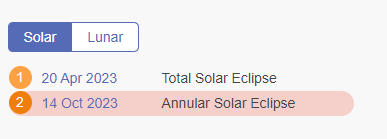

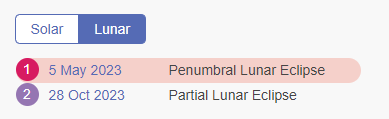

Notamos que el programa en suficientemente preciso en cuanto a la determinación de las fechas en las cuales suceden los eclipses, sin embargo en algunos de los casos se presentan algunos desfases de un día. \\
La razón de esto es que las horas a las cuales trabaja el programa es a la media noche, y ello conduce a que la diferencia de longitudes no sea exactamente cero o 180, sino que se consideran aproximaciones a estos resultados. \\
Entre más datos sean considerados con intervalos de tiempo menores a un día, podrá obtenerse una mayor precisión en cuanto a la fecha y hora en la cual suceden los eclipses.